In [2]:
import gym  # If gym isn't installed yet in your environment, then you can install it via pip: pip install gym
import numpy as np

In [2]:
env = gym.make('LunarLander-v2')
env.reset()
for _ in range(200):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample())
env.close()

## Naiven Random Search

In [6]:
env = gym.make('LunarLander-v2')
best_param = np.zeros(8)
best_cumulative_reward = 0.0
for epoch in range(2000):
    observation = env.reset()
    param = 2 * np.random.rand(8) - 1 # initialize new random parameter
    done = False
    cumulative_reward = 0.0
    while not done:
        # choose action according to our model
        action = 0 if np.dot(param, observation) < 0.0 else 1
        observation, reward, done, _ = env.step(action)
        cumulative_reward += reward
    
    if cumulative_reward > best_cumulative_reward:
        best_param = param
        best_cumulative_reward = cumulative_reward
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [13]:
env = gym.make('LunarLander-v2')
done = False
observation = env.reset()
cum_reward = 0.0
while not done:
    env.render()
    action = 0 if np.dot(best_param, observation) < 0.0 else 1
    observation, reward, done, _  = env.step(action)
    cum_reward += reward
env.close()
print(cum_reward)

-147.9443757322111


## Hill Climbing

In [45]:
class HillClimbRandomPolicy(object):
    def __init__(self, dim=4):
        self.dim = dim
        self.param = self._resample()
        self.max_reward = 0.0
        self.epsilon = 0.1
        self.best_param = self.param
        
    def _resample(self):
        return 2 * np.random.rand(self.dim) - 1
    
    def action(self, observation):
        return 0 if np.dot(observation, self.param) < 0.0 else 1
    
    def best_action(self, observation):
        return 0 if np.dot(observation, self.best_param) < 0.0 else 1
    
    def update(self, history):
        total_reward = np.sum([h['reward'] for h in history])
        if total_reward > self.max_reward:
            self.max_reward = total_reward
            self.best_param = self.param
        else:
            self.param = self.best_param
        self.param += self.epsilon * self._resample()

In [ ]:
from IPython.display import clear_output
env = gym.make('LunarLander-v2')
policy = HillClimbRandomPolicy(dim=8)
for epoch in range(30000):
    clear_output(wait=True)
    done = False
    observation = env.reset()
    history = []
    while not done:
        action = policy.action(observation)
        history_elem = {}
        history_elem['observation'] = observation
        history_elem['action'] = action
        observation, reward, done, _ = env.step(action)
        history_elem['reward'] = reward
        
        history.append(history_elem)

    policy.update(history)
    print(epoch)
print('done')

In [ ]:
env = gym.make('LunarLander-v2')
done = False
observation = env.reset()
cum_reward = 0.0
while not done:
    env.render()
    action = policy.best_action(observation)
    observation, reward, done, _  = env.step(action)
    cum_reward += reward
env.close()
print(cum_reward)

50


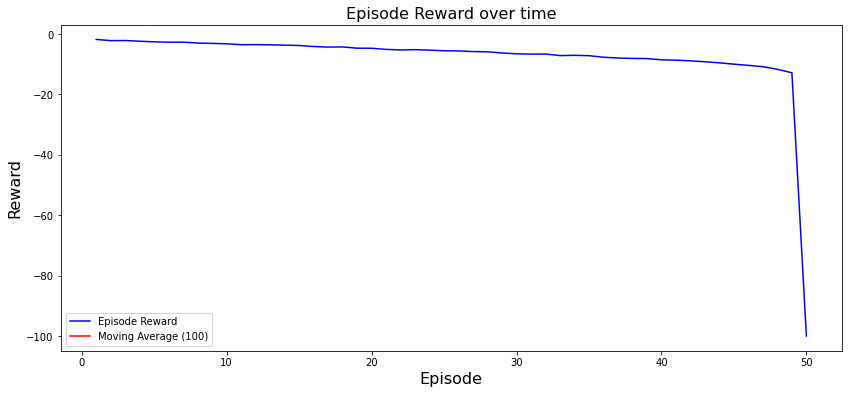

In [44]:
import numpy as np
print(len(history))
reward_per_episode = [history[count]["reward"] for count,h in enumerate(history)]
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.plot(range(1, len(reward_per_episode) + 1), reward_per_episode, 'b', label='Episode Reward')
ax.plot(range(1, len(reward_per_episode) - 99 + 1), moving_average(reward_per_episode, 100), 'r', label='Moving Average (100)')
# ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax.set_title('Episode Reward over time', fontsize=16)
ax.set_xlabel('Episode', fontsize=16)
ax.set_ylabel('Reward', fontsize=16)
ax.legend()
plt.show()

In [38]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## DQN
https://github.com/fakemonk1/Reinforcement-Learning-Lunar_Lander/blob/master/Lunar_Lander.py

In [2]:
from tensorflow import keras
import random
from collections import deque

class DQN:
    def __init__(self, env, lr, gamma, epsilon, epsilon_decay):

        self.env = env
        self.action_space = env.action_space
        self.observation_space = env.observation_space
        self.counter = 0

        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.rewards_list = []

        self.replay_memory_buffer = deque(maxlen=500000)
        self.batch_size = 64
        self.epsilon_min = 0.01
        self.num_action_space = self.action_space.n
        self.num_observation_space = env.observation_space.shape[0]
        self.model = self.initialize_model()

    def initialize_model(self):
        model = keras.Sequential()
        model.add(keras.layers.Dense(512, input_dim=self.num_observation_space, activation=keras.layers.Activation('relu')))
        model.add(keras.layers.Dense(256, activation=keras.layers.Activation('relu')))
        model.add(keras.layers.Dense(self.num_action_space, activation=keras.layers.Activation('linear')))

        # Compile the model
        model.compile(loss=keras.losses.MeanSquaredError(),optimizer=keras.optimizers.Adam(lr=self.lr))
        print(model.summary())
        return model

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return random.randrange(self.num_action_space)

        predicted_actions = self.model.predict(state)
        return np.argmax(predicted_actions[0])

    def add_to_replay_memory(self, state, action, reward, next_state, done):
        self.replay_memory_buffer.append((state, action, reward, next_state, done))

    def learn_and_update_weights_by_reply(self):

        # replay_memory_buffer size check
        if len(self.replay_memory_buffer) < self.batch_size or self.counter != 0:
            return

        # Early Stopping
        if np.mean(self.rewards_list[-10:]) > 180:
            return

        random_sample = self.get_random_sample_from_replay_mem()
        states, actions, rewards, next_states, done_list = self.get_attribues_from_sample(random_sample)
        targets = rewards + self.gamma * (np.amax(self.model.predict_on_batch(next_states), axis=1)) * (1 - done_list)
        target_vec = self.model.predict_on_batch(states)
        indexes = np.array([i for i in range(self.batch_size)])
        target_vec[[indexes], [actions]] = targets

        self.model.fit(states, target_vec, epochs=1, verbose=0)

    def get_attribues_from_sample(self, random_sample):
        states = np.array([i[0] for i in random_sample])
        actions = np.array([i[1] for i in random_sample])
        rewards = np.array([i[2] for i in random_sample])
        next_states = np.array([i[3] for i in random_sample])
        done_list = np.array([i[4] for i in random_sample])
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        return np.squeeze(states), actions, rewards, next_states, done_list

    def get_random_sample_from_replay_mem(self):
        random_sample = random.sample(self.replay_memory_buffer, self.batch_size)
        return random_sample

    def train(self, num_episodes=2000, can_stop=True):
        for episode in range(num_episodes):
            state = env.reset()
            reward_for_episode = 0
            num_steps = 1000
            state = np.reshape(state, [1, self.num_observation_space])
            for step in range(num_steps):
                env.render()
                received_action = self.get_action(state)
                #print("received_action:", received_action)
                next_state, reward, done, info = env.step(received_action)
                next_state = np.reshape(next_state, [1, self.num_observation_space])
                # Store the experience in replay memory
                self.add_to_replay_memory(state, received_action, reward, next_state, done)
                # add up rewards
                reward_for_episode += reward
                state = next_state
                self.update_counter()
                self.learn_and_update_weights_by_reply()

                if done:
                    break
            self.rewards_list.append(reward_for_episode)

            # Decay the epsilon after each experience completion
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

            # Check for breaking condition
            last_rewards_mean = np.mean(self.rewards_list[-100:])
            if last_rewards_mean > 200 and can_stop:
                print("DQN Training Complete...")
                break
            print(episode, "\t: Episode || Reward: ",reward_for_episode, "\t|| Average Reward: ",last_rewards_mean, "\t epsilon: ", self.epsilon )

    def update_counter(self):
        self.counter += 1
        step_size = 5
        self.counter = self.counter % step_size


In [3]:
def test_already_trained_model(trained_model):
    rewards_list = []
    num_test_episode = 100
    env = gym.make("LunarLander-v2")
    print("Starting Testing of the trained model...")

    step_count = 1000

    for test_episode in range(num_test_episode):
        current_state = env.reset()
        num_observation_space = env.observation_space.shape[0]
        current_state = np.reshape(current_state, [1, num_observation_space])
        reward_for_episode = 0
        for step in range(step_count):
            env.render()
            selected_action = np.argmax(trained_model.predict(current_state)[0])
            new_state, reward, done, info = env.step(selected_action)
            new_state = np.reshape(new_state, [1, num_observation_space])
            current_state = new_state
            reward_for_episode += reward
            if done:
                break
        rewards_list.append(reward_for_episode)
        print(test_episode, "\t: Episode || Reward: ", reward_for_episode)

    return rewards_list


def plot_df(df, chart_name, title, x_axis_label, y_axis_label):
    plt.rcParams.update({'font.size': 17})
    df['rolling_mean'] = df[df.columns[0]].rolling(100).mean()
    plt.figure(figsize=(15, 8))
    plt.close()
    plt.figure()
    # plot = df.plot(linewidth=1.5, figsize=(15, 8), title=title)
    plot = df.plot(linewidth=1.5, figsize=(15, 8))
    plot.set_xlabel(x_axis_label)
    plot.set_ylabel(y_axis_label)
    # plt.ylim((-400, 300))
    fig = plot.get_figure()
    plt.legend().set_visible(False)
    fig.savefig(chart_name)


def plot_df2(df, chart_name, title, x_axis_label, y_axis_label):
    df['mean'] = df[df.columns[0]].mean()
    plt.rcParams.update({'font.size': 17})
    plt.figure(figsize=(15, 8))
    plt.close()
    plt.figure()
    # plot = df.plot(linewidth=1.5, figsize=(15, 8), title=title)
    plot = df.plot(linewidth=1.5, figsize=(15, 8))
    plot.set_xlabel(x_axis_label)
    plot.set_ylabel(y_axis_label)
    plt.ylim((0, 300))
    plt.xlim((0, 100))
    plt.legend().set_visible(False)
    fig = plot.get_figure()
    fig.savefig(chart_name)

In [ ]:
import pandas as pd
env = gym.make('LunarLander-v2')
# set seeds

env.seed(21)
np.random.seed(21)

# setting up params
lr = 0.001
epsilon = 1.0
epsilon_decay = 0.995
gamma = 0.99
training_episodes = 1000
model = DQN(env, lr, gamma, epsilon, epsilon_decay)
model.train(training_episodes, True)

reward_df = pd.DataFrame(model.rewards_list)
test_rewards = test_already_trained_model(trained_model)

plot_df(reward_df, "Figure 1: Reward for each training episode", "Reward for each training episode", "Episode","Reward")
plot_df2(pd.DataFrame(test_rewards), "Figure 2: Reward for each testing episode","Reward for each testing episode", "Episode", "Reward")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 136,964
Trainable params: 136,964
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\larsh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\larsh\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0 	: Episode || Reward:  -444.4426211924587 	|| Average Reward:  -444.4426211924587 	 epsilon:  0.995
1 	: Episode || Reward:  -111.20663665344993 	|| Average Reward:  -277.82462892295433 	 epsilon:  0.990025
2 	: Episode || Reward:  -98.59437587064873 	|| Average Reward:  -218.08121123885246 	 epsilon:  0.985074875
3 	: Episode || Reward:  -361.4966790443282 	|| Average Reward:  -253.9350781902214 	 epsilon:  0.9801495006250001
4 	: Episode || Reward:  -57.54297790829867 	|| Average Reward:  -214.65665813383686 	 epsilon:  0.9752487531218751
5 	: Episode || Reward:  -163.22106582619364 	|| Average Reward:  -206.0840594158963 	 epsilon:  0.9703725093562657
6 	: Episode || Reward:  -147.00768031277073 	|| Average Reward:  -197.64457668687834 	 epsilon:  0.9655206468094844
7 	: Episode || Reward:  -130.01220513543603 	|| Average Reward:  -189.19053024294809 	 epsilon:  0.960693043575437
8 	: Episode || Reward:  -107.10414043835323 	|| Average Reward:  -180.06982026465977 	 epsilon:  0.95

71 	: Episode || Reward:  -122.73044973685376 	|| Average Reward:  -120.30305085608317 	 epsilon:  0.697046600835495
72 	: Episode || Reward:  -103.35613063608058 	|| Average Reward:  -120.07090126402834 	 epsilon:  0.6935613678313175
73 	: Episode || Reward:  -106.17069519827348 	|| Average Reward:  -119.88306064151816 	 epsilon:  0.6900935609921609
74 	: Episode || Reward:  -146.8144036166243 	|| Average Reward:  -120.24214521451958 	 epsilon:  0.6866430931872001
75 	: Episode || Reward:  -62.41133565896242 	|| Average Reward:  -119.4812135098412 	 epsilon:  0.6832098777212641
76 	: Episode || Reward:  -88.53919355865962 	|| Average Reward:  -119.07936909489078 	 epsilon:  0.6797938283326578
77 	: Episode || Reward:  -109.68423775279597 	|| Average Reward:  -118.95891869306904 	 epsilon:  0.6763948591909945
78 	: Episode || Reward:  -136.7226189721745 	|| Average Reward:  -119.18377565862735 	 epsilon:  0.6730128848950395
79 	: Episode || Reward:  -195.00051535167765 	|| Average Rewa

141 	: Episode || Reward:  -35.37161047426882 	|| Average Reward:  -82.23221156059093 	 epsilon:  0.4907693883854626
142 	: Episode || Reward:  -50.785647439930074 	|| Average Reward:  -81.4398669767893 	 epsilon:  0.4883155414435353
143 	: Episode || Reward:  -5.520543790149503 	|| Average Reward:  -80.09648351713686 	 epsilon:  0.4858739637363176
144 	: Episode || Reward:  -64.0617602266042 	|| Average Reward:  -79.89445318959876 	 epsilon:  0.483444593917636
145 	: Episode || Reward:  -78.56466007487606 	|| Average Reward:  -79.26984146128093 	 epsilon:  0.4810273709480478
146 	: Episode || Reward:  -68.03173829770674 	|| Average Reward:  -79.35887328025677 	 epsilon:  0.47862223409330756
147 	: Episode || Reward:  -0.30251448203003406 	|| Average Reward:  -78.95264621792508 	 epsilon:  0.47622912292284103
148 	: Episode || Reward:  -20.522783850448334 	|| Average Reward:  -76.85397676652629 	 epsilon:  0.4738479773082268
149 	: Episode || Reward:  -248.0710468877671 	|| Average Rew

211 	: Episode || Reward:  5.298543107319631 	|| Average Reward:  -51.96410089863541 	 epsilon:  0.3455358541129786
212 	: Episode || Reward:  -62.161234830653484 	|| Average Reward:  -51.46024768392555 	 epsilon:  0.3438081748424137
213 	: Episode || Reward:  -125.7062015908989 	|| Average Reward:  -52.008491602310635 	 epsilon:  0.3420891339682016
214 	: Episode || Reward:  82.0576011172958 	|| Average Reward:  -50.8123673219686 	 epsilon:  0.3403786882983606
215 	: Episode || Reward:  87.50365534149856 	|| Average Reward:  -49.680187322419435 	 epsilon:  0.3386767948568688
216 	: Episode || Reward:  68.00565460756737 	|| Average Reward:  -48.3270739632156 	 epsilon:  0.33698341088258443
217 	: Episode || Reward:  138.8156313777981 	|| Average Reward:  -46.402544713828355 	 epsilon:  0.3352984938281715
218 	: Episode || Reward:  -33.147318403963965 	|| Average Reward:  -46.197855887242916 	 epsilon:  0.33362200135903064
219 	: Episode || Reward:  109.16853430161423 	|| Average Reward

281 	: Episode || Reward:  72.13897854785651 	|| Average Reward:  26.75836448769007 	 epsilon:  0.24328132378095624
282 	: Episode || Reward:  100.86471793817758 	|| Average Reward:  28.19188245464633 	 epsilon:  0.24206491716205145
283 	: Episode || Reward:  85.12820016418202 	|| Average Reward:  29.61277276365978 	 epsilon:  0.2408545925762412
284 	: Episode || Reward:  115.445141591511 	|| Average Reward:  29.550483295937383 	 epsilon:  0.23965031961336
285 	: Episode || Reward:  -4.766349812213946 	|| Average Reward:  29.379541946191186 	 epsilon:  0.2384520680152932
286 	: Episode || Reward:  118.91803654333083 	|| Average Reward:  29.721380448375008 	 epsilon:  0.23725980767521673
287 	: Episode || Reward:  210.5141222176199 	|| Average Reward:  31.148689162644356 	 epsilon:  0.23607350863684065
288 	: Episode || Reward:  -24.710127080825643 	|| Average Reward:  31.46956307831289 	 epsilon:  0.23489314109365644
289 	: Episode || Reward:  85.70577127189301 	|| Average Reward:  31.

352 	: Episode || Reward:  117.61691020530037 	|| Average Reward:  97.9714680524499 	 epsilon:  0.17043057265153258
353 	: Episode || Reward:  133.18300887277348 	|| Average Reward:  97.52112114977295 	 epsilon:  0.16957841978827493
354 	: Episode || Reward:  74.59133591343176 	|| Average Reward:  98.72251803627191 	 epsilon:  0.16873052768933355
355 	: Episode || Reward:  168.55812541523653 	|| Average Reward:  101.77269529469355 	 epsilon:  0.1678868750508869
356 	: Episode || Reward:  276.38909063689744 	|| Average Reward:  104.18009846452708 	 epsilon:  0.16704744067563246
357 	: Episode || Reward:  88.80014387903954 	|| Average Reward:  105.27455777588959 	 epsilon:  0.1662122034722543
358 	: Episode || Reward:  253.42789077944434 	|| Average Reward:  106.99343241999586 	 epsilon:  0.16538114245489302
359 	: Episode || Reward:  264.5106676149972 	|| Average Reward:  108.41668167608559 	 epsilon:  0.16455423674261854
360 	: Episode || Reward:  275.7606543411071 	|| Average Reward: 

## Monte Carlo
https://github.com/omargup/Lunar-Lander/blob/master/Monte_Carlo_LunarLander.ipynb

In [4]:
import numpy as np
import gym
import random
import math

In [3]:
def set_buckets_and_actions():
    number_of_buckets = (5,5,5,5,5,5,2,2) #buckets in each dimension
    number_of_actions = env.action_space.n
    
    #Creating a 2-tuple with the original bounds of each dimension
    state_value_bounds = list(zip(env.observation_space.low,env.observation_space.high))
    
    #New bound values for each dimension
    state_value_bounds[0] = [-1,1]      #Position x
    state_value_bounds[1] = [-1,1]    #Position y
    state_value_bounds[2] = [-1,1]        #vel x
    state_value_bounds[3] = [-1,1]    #vel y
    state_value_bounds[4] = [-1,1]        #angle
    state_value_bounds[5] = [-1,1]        #angular vel
    state_value_bounds[6] = [0,1]
    state_value_bounds[7] = [0,1]
    
    return number_of_buckets, number_of_actions, state_value_bounds

In [5]:

def bucketize(state):
    bucket_indexes = []
    for i in range(len(state)):
        if state[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_value_bounds[i][1]:
            bucket_index = number_of_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (number_of_buckets[i]-1) * state_value_bounds[i][0]/bound_width
            scaling = (number_of_buckets[i]-1) / bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)

In [6]:

def initialize_q_table():
    return np.zeros(number_of_buckets + (number_of_actions,))

In [8]:
def initialize_visits_table():
    return np.zeros(number_of_buckets + (number_of_actions,))

def decay_function(episode):
    return max(min_epsilon, min(max_epsilon, 1.0 - 
                              math.log10((episode + 1) / (total_train_episodes*0.1))))


def choose_action(q_table, bucket_state, epsilon):
    if (np.random.random() <= epsilon):
        #print("random")
        return env.action_space.sample() #Exploration
    else:
        #print("greedy")
        return np.argmax(q_table[bucket_state]) #Eplotation

In [9]:
# ******* Generate an episode following pi: S0, A0, R1, ...S_T-1,A_T-1,R_T
def Generate_episode(epsilon, q_table, max_env_steps):
    # Control variables
    total_reward = 0
    done = False
        
    trayectory = []
        
    # Initialize S
    # Reset the environment getting the initial state
    bucket_state = bucketize(env.reset())

    # Loop for each step of episode:
    for step in range(max_env_steps):
            #print("step ", step)

        # Choose A from S using a soft policy derived from Q (e.g., epsilon-greedy)
        action = choose_action(q_table, bucket_state, epsilon)
            #print(q_table[bucket_state])
            #print("action ", action)

        # Take the action A, observe R, S'
        new_state, reward, done, info = env.step(action)
        bucket_new_state = bucketize(new_state)
            #print("reward ", reward)
            
        trayectory.append([bucket_state, action, reward])
            
        # new_state is now the current state
        bucket_state = bucket_new_state

        total_reward += reward

        # if done, finish the episode
        if done:
            break
    
    return trayectory, total_reward

In [10]:
def Monte_Carlo():
    # ******* Initialize 𝑄(s,a) arbitrarily.
    q_table = initialize_q_table()
    #print("Q_Table shape: ", q_table.shape)
    
    # ******* Initialize Returns(s,a) empty list
    # initialize visits_counter instead (for incremental implementation of the average)
    visits_counter = initialize_visits_table()
    
    rewards = []
    
    max_env_steps = env._max_episode_steps   #1000 in LunarLander
    #print("Max env steps: ", max_env_steps)
    

    
    # ******* Loop for each episode:
    for episode in range(total_train_episodes):
        #print("\n\n ***Episode*** ", episode)
        
        # ******* Generate an episode following pi: S0, A0, R1, ...S_T-1,A_T-1,R_T
        #Update epsilon
        epsilon = decay_function(episode)
        #print("Epsilon ", epsilon)
        trayectory ,total_reward = Generate_episode(epsilon, q_table, max_env_steps)
        
        # ******* G <-- 0
        G = 0
        
        
        # ******* Loop for each step of episode: t = T-1, T-2, ..., 0
        for t in reversed(range(len(trayectory))):
            #print("\n step", t)
            s_t, a_t, r_t = trayectory[t]
            # ******* G <-- gamma*G + R_{t+1}
            G = gamma*G + r_t
            #print("G ", G)
            
            # ******* Unless the pair S_t,A_t appears in S_0,A_0,R_1, ...,S_{t-1},A_{t-1}: 
            if not [s_t, a_t] in [[x[0], x[1]] for x in trayectory[0:t]]:
                #print("YES First visit ", s_t, a_t)
                
                # ******* Append G to Returns(S_t,A_t)
                # ******* Q(S_t,A_t) <-- average(Returns(S_t,A_t))
                # Using incremental implementation: Q(S_t,A_t)= Q_n <-- Q_n + (1/n)*(G_n - Q_n)
                visits_counter[s_t][a_t] += 1
                #print("visits_counter ", visits_counter[s_t][a_t])
                #print("old Q value ", q_table[s_t][a_t])
                q_table[s_t][a_t] += (G - q_table[s_t][a_t]) / visits_counter[s_t][a_t]
                #print("new Q value ", q_table[s_t][a_t])
            #else: print("NO first visit ", s_t, a_t)
        
                  
        #print("total_reward ", total_reward)
        
        if episode % 50 == 0:
            rewards.append(total_reward)
            print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward))  
    
    rewards.append(total_reward)
    print("Episode {}, epsilon {:5.4f}, reward {:6.2f}".format(episode,epsilon,total_reward))
    return q_table, rewards

In [11]:
n_times = 5
total_train_episodes = 10000
gamma = 0.99                     
max_epsilon = 1.0
min_epsilon = 0.01   

env = gym.make('LunarLander-v2')
number_of_buckets, number_of_actions, state_value_bounds = set_buckets_and_actions()

MC_tables = []
MC_rewards = []

for number in range(n_times):
    print("\n ********** Training number ", number)
    q_table,rewards = Monte_Carlo()
    MC_tables.append(q_table)
    MC_rewards.append(rewards)


 ********** Training number  0
Episode 0, epsilon 1.0000, reward -122.01
Episode 50, epsilon 1.0000, reward  14.67
Episode 100, epsilon 1.0000, reward -204.37
Episode 150, epsilon 1.0000, reward  42.49
Episode 200, epsilon 1.0000, reward -216.81
Episode 250, epsilon 1.0000, reward -99.47
Episode 300, epsilon 1.0000, reward -253.94
Episode 350, epsilon 1.0000, reward -247.39
Episode 400, epsilon 1.0000, reward -358.04
Episode 450, epsilon 1.0000, reward -319.43
Episode 500, epsilon 1.0000, reward  24.94
Episode 550, epsilon 1.0000, reward -389.87
Episode 600, epsilon 1.0000, reward -130.25
Episode 650, epsilon 1.0000, reward -87.05
Episode 700, epsilon 1.0000, reward -336.94
Episode 750, epsilon 1.0000, reward -126.65
Episode 800, epsilon 1.0000, reward -235.24
Episode 850, epsilon 1.0000, reward -346.80
Episode 900, epsilon 1.0000, reward -320.60
Episode 950, epsilon 1.0000, reward -137.08
Episode 1000, epsilon 0.9996, reward -68.33
Episode 1050, epsilon 0.9784, reward -212.40
Episode

Episode 9250, epsilon 0.0338, reward -59.08
Episode 9300, epsilon 0.0315, reward -87.42
Episode 9350, epsilon 0.0291, reward -18.64
Episode 9400, epsilon 0.0268, reward -49.18
Episode 9450, epsilon 0.0245, reward 239.12
Episode 9500, epsilon 0.0222, reward -10.74
Episode 9550, epsilon 0.0200, reward 227.33
Episode 9600, epsilon 0.0177, reward 218.41
Episode 9650, epsilon 0.0154, reward  71.38
Episode 9700, epsilon 0.0132, reward -30.43
Episode 9750, epsilon 0.0110, reward -63.06
Episode 9800, epsilon 0.0100, reward  40.92
Episode 9850, epsilon 0.0100, reward  12.91
Episode 9900, epsilon 0.0100, reward 226.69
Episode 9950, epsilon 0.0100, reward  49.02
Episode 9999, epsilon 0.0100, reward -56.56

 ********** Training number  1
Episode 0, epsilon 1.0000, reward -72.16
Episode 50, epsilon 1.0000, reward -154.04
Episode 100, epsilon 1.0000, reward -157.72
Episode 150, epsilon 1.0000, reward -279.46
Episode 200, epsilon 1.0000, reward -310.27
Episode 250, epsilon 1.0000, reward -109.21
Epis

Episode 8500, epsilon 0.0705, reward   5.76
Episode 8550, epsilon 0.0680, reward -95.80
Episode 8600, epsilon 0.0655, reward -46.98
Episode 8650, epsilon 0.0629, reward 265.94
Episode 8700, epsilon 0.0604, reward  75.96
Episode 8750, epsilon 0.0579, reward  12.63
Episode 8800, epsilon 0.0555, reward  71.71
Episode 8850, epsilon 0.0530, reward -182.52
Episode 8900, epsilon 0.0506, reward 172.36
Episode 8950, epsilon 0.0481, reward -94.58
Episode 9000, epsilon 0.0457, reward -56.18
Episode 9050, epsilon 0.0433, reward 253.68
Episode 9100, epsilon 0.0409, reward 273.64
Episode 9150, epsilon 0.0385, reward  24.19
Episode 9200, epsilon 0.0362, reward 281.03
Episode 9250, epsilon 0.0338, reward 239.33
Episode 9300, epsilon 0.0315, reward  62.04
Episode 9350, epsilon 0.0291, reward -196.54
Episode 9400, epsilon 0.0268, reward -44.89
Episode 9450, epsilon 0.0245, reward 176.48
Episode 9500, epsilon 0.0222, reward 147.45
Episode 9550, epsilon 0.0200, reward -136.08
Episode 9600, epsilon 0.0177,

Episode 7750, epsilon 0.1106, reward   2.46
Episode 7800, epsilon 0.1078, reward 181.70
Episode 7850, epsilon 0.1051, reward -234.81
Episode 7900, epsilon 0.1023, reward  83.06
Episode 7950, epsilon 0.0996, reward -77.67
Episode 8000, epsilon 0.0969, reward -40.58
Episode 8050, epsilon 0.0942, reward -16.29
Episode 8100, epsilon 0.0915, reward  -4.09
Episode 8150, epsilon 0.0888, reward  98.94
Episode 8200, epsilon 0.0861, reward -45.22
Episode 8250, epsilon 0.0835, reward -218.18
Episode 8300, epsilon 0.0809, reward  90.19
Episode 8350, epsilon 0.0783, reward  36.91
Episode 8400, epsilon 0.0757, reward  59.85
Episode 8450, epsilon 0.0731, reward -57.38
Episode 8500, epsilon 0.0705, reward  39.83
Episode 8550, epsilon 0.0680, reward  12.32
Episode 8600, epsilon 0.0655, reward 194.43
Episode 8650, epsilon 0.0629, reward -189.83
Episode 8700, epsilon 0.0604, reward  25.46
Episode 8750, epsilon 0.0579, reward 159.39
Episode 8800, epsilon 0.0555, reward 243.84
Episode 8850, epsilon 0.0530,

Episode 6950, epsilon 0.1580, reward -39.09
Episode 7000, epsilon 0.1548, reward -29.93
Episode 7050, epsilon 0.1517, reward -322.79
Episode 7100, epsilon 0.1487, reward -27.44
Episode 7150, epsilon 0.1456, reward -10.58
Episode 7200, epsilon 0.1426, reward  42.82
Episode 7250, epsilon 0.1396, reward  12.17
Episode 7300, epsilon 0.1366, reward 177.09
Episode 7350, epsilon 0.1337, reward  11.38
Episode 7400, epsilon 0.1307, reward 201.21
Episode 7450, epsilon 0.1278, reward 118.15
Episode 7500, epsilon 0.1249, reward -13.54
Episode 7550, epsilon 0.1220, reward -52.65
Episode 7600, epsilon 0.1191, reward  -3.71
Episode 7650, epsilon 0.1163, reward  -8.02
Episode 7700, epsilon 0.1135, reward 175.35
Episode 7750, epsilon 0.1106, reward -10.62
Episode 7800, epsilon 0.1078, reward   0.05
Episode 7850, epsilon 0.1051, reward 276.17
Episode 7900, epsilon 0.1023, reward -30.17
Episode 7950, epsilon 0.0996, reward  47.20
Episode 8000, epsilon 0.0969, reward   2.96
Episode 8050, epsilon 0.0942, r

Episode 6150, epsilon 0.2111, reward  12.43
Episode 6200, epsilon 0.2075, reward  42.40
Episode 6250, epsilon 0.2041, reward -45.39
Episode 6300, epsilon 0.2006, reward -19.15
Episode 6350, epsilon 0.1972, reward   1.16
Episode 6400, epsilon 0.1938, reward -18.80
Episode 6450, epsilon 0.1904, reward -34.25
Episode 6500, epsilon 0.1870, reward   2.07
Episode 6550, epsilon 0.1837, reward  48.42
Episode 6600, epsilon 0.1804, reward  17.78
Episode 6650, epsilon 0.1771, reward 227.52
Episode 6700, epsilon 0.1739, reward  45.46
Episode 6750, epsilon 0.1706, reward -103.72
Episode 6800, epsilon 0.1674, reward -35.16
Episode 6850, epsilon 0.1642, reward -22.27
Episode 6900, epsilon 0.1611, reward -36.85
Episode 6950, epsilon 0.1580, reward  31.75
Episode 7000, epsilon 0.1548, reward 232.15
Episode 7050, epsilon 0.1517, reward -46.89
Episode 7100, epsilon 0.1487, reward -50.12
Episode 7150, epsilon 0.1456, reward  49.27
Episode 7200, epsilon 0.1426, reward   7.44
Episode 7250, epsilon 0.1396, r

In [12]:
MC_mean = np.mean(np.array(MC_rewards),axis=0)
#print(MC_mean.shape)
#np.save('MC_mean', MC_mean)
#np.save('MC_tables', MC_tables)

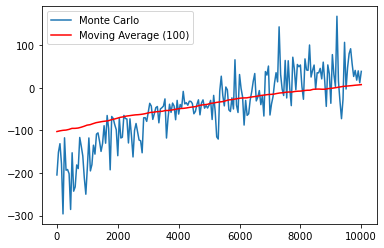

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

x = np.linspace(0, total_train_episodes, MC_mean.size)
plt.plot(x, MC_mean, label='Monte Carlo')
z = np.linspace(0, total_train_episodes, len(moving_average(MC_mean, 100)))
plt.plot(z, moving_average(MC_mean, 100), 'r', label='Moving Average (100)')



# Add a legend
plt.legend()

# Show the plot
plt.show()

In [16]:
total_test_episodes = 10
q_tables = np.load('MC_tables.npy')
q_table = q_tables[0]
rewards = []
max_env_steps = env._max_episode_steps
number_of_buckets, number_of_actions, state_value_bounds = set_buckets_and_actions()

# ******* Loop for each episode:
for episode in range(total_test_episodes):
    #print("***Episode*** ", episode)
    
    # Control variables
    total_rewards = 0
    done =  False
    
    # ******* Initialize S
    # Reset the environment getting the initial state
    bucket_state = bucketize(env.reset())
    
    # *******Loop for each step of episode:
    for step in range(max_env_steps):
        env.render()
        
        #******* Choose A from S using policy derived from Q (greedy in this case)
        action = np.argmax(q_table[bucket_state])
        #print(action)
        
        # ******* Take the action A, observe R, S'
        new_state, reward, done, info = env.step(action)
        bucket_new_state = bucketize(new_state)
        
        # new_state is now the current state
        bucket_state =  bucket_new_state
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print("Score ", total_rewards)
            break
                
env.close()
print("\nAverage score " + str(sum(rewards)/total_test_episodes))

Score  -93.57869810615986
Score  -6.129404267742032
Score  -64.54266990077396
Score  -21.8400075180825
Score  -22.17541821686116
Score  17.136371987167834
Score  189.55693236805195
Score  178.59355409272553
Score  -48.78758572536567
Score  99.81732435860695

Average score 22.805039907156704


In [14]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## Q-Learning
https://github.com/FitMachineLearning/FitML/blob/master/QLearning/LunarLander_v2.py

In [20]:
import numpy as np
from tensorflow import keras
import gym
import os
import h5py



num_env_variables = 8
num_env_actions = 4
num_initial_observation = 15
learning_rate = 0.003
weigths_filename = "LL-QL-v2-weights.h5"

b_discount = 0.99
max_memory_len = 60000
starting_explore_prob = 0.05
training_epochs = 3
load_previous_weights = True
observe_and_train = True
save_weights = True
num_games_to_play = 1000


#One hot encoding array
possible_actions = np.arange(0,num_env_actions)
actions_1_hot = np.zeros((num_env_actions,num_env_actions))
actions_1_hot[np.arange(num_env_actions),possible_actions] = 1

#Create testing enviroment
env = gym.make('LunarLander-v2')
env.reset()

#initialize training matrix with random states and actions
dataX = np.random.random(( 5,num_env_variables+num_env_actions ))
#Only one output for the total score
dataY = np.random.random((5,1))



#nitialize the Neural Network with random weights

model = keras.Sequential()
#model.add(Dense(num_env_variables+num_env_actions, activation='tanh', input_dim=dataX.shape[1]))
model.add(keras.layers.Dense(512, activation='relu', input_dim=dataX.shape[1]))
model.add(keras.layers.Dense(256, activation='relu' ))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(dataY.shape[1]))

opt = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

#load previous model weights if they exist
if load_previous_weights:
    dir_path = os.path.realpath(".")
    fn = dir_path + "/"+weigths_filename
    print("filepath ", fn)
    if  os.path.isfile(fn):
        print("loading weights")
        model.load_weights(weigths_filename)
    else:
        print("File ",weigths_filename," does not exis. Retraining... ")

#Initialize training data array
total_steps = 0
dataX = np.zeros(shape=(1,num_env_variables+num_env_actions))
dataY = np.zeros(shape=(1,1))

#Initialize Memory Array data array
memoryX = np.zeros(shape=(1,num_env_variables+num_env_actions))
memoryY = np.zeros(shape=(1,1))


print("dataX shape", dataX.shape)
print("dataY shape", dataY.shape)


#This function predicts the reward that will result from taking an "action" at a state "qstate"
def predictTotalRewards(qstate, action):
    qs_a = np.concatenate((qstate,actions_1_hot[action]), axis=0)
    predX = np.zeros(shape=(1,num_env_variables+num_env_actions))
    predX[0] = qs_a

    #print("trying to predict reward at qs_a", predX[0])
    pred = model.predict(predX[0].reshape(1,predX.shape[1]))
    remembered_total_reward = pred[0][0]
    return remembered_total_reward



if observe_and_train:

    #Play the game a determine number of times
    for game in range(num_games_to_play):
        gameX = np.zeros(shape=(1,num_env_variables+num_env_actions))
        gameY = np.zeros(shape=(1,1))
        #Get the initial Q state
        qs = env.reset()
        for step in range (40000):

            #Learn from observation and not playing
            if game < num_initial_observation:
                #take a radmon action
                a = env.action_space.sample()
            else:
                #Now playing and also learning from experience during play

                #Calculate probability to take deterministic action vs random action (epsilon)
                prob = np.random.rand(1)
                explore_prob = starting_explore_prob-(starting_explore_prob/num_games_to_play)*game

                #Chose between prediction and chance
                if prob < explore_prob:
                    #take a random action
                    a=env.action_space.sample()
                    #print("taking random action",a, "at total_steps" , total_steps)
                    #print("prob ", prob, "explore_prob", explore_prob)

                else:
                    ##chose an action by estimating the function-estimator remembered consequences of all possible actions
                    ## Bellman states that the best policy (i.e. action) is the one that maximizez expected rewards for future states
                    ## to caculate rewards we compute the reward a this state t + the discounted (b_discount) reward at all possible state t+1
                    ## all states t+1 are estimated by our function estimator (our Neural Network)


                    utility_possible_actions = np.zeros(shape=(num_env_actions))

                    utility_possible_actions[0] = predictTotalRewards(qs,0)
                    utility_possible_actions[1] = predictTotalRewards(qs,1)
                    utility_possible_actions[2] = predictTotalRewards(qs,2)
                    utility_possible_actions[3] = predictTotalRewards(qs,3)


                    #chose argmax action of estimated anticipated rewards
                    #print("utility_possible_actions ",utility_possible_actions)
                    #print("argmax of utitity", np.argmax(utility_possible_actions))
                    a = np.argmax(utility_possible_actions)



            #env.render()
            qs_a = np.concatenate((qs,actions_1_hot[a]), axis=0)

            #print("action",a," qs_a",qs_a)
            #Perform the optimal action and get the target state and reward
            s,r,done,info = env.step(a)


            #record information for training and memory
            if step ==0:
                gameX[0] = qs_a
                gameY[0] = np.array([r])
                memoryX[0] = qs_a
                memoryY[0] = np.array([r])

            gameX = np.vstack((gameX,qs_a))
            gameY = np.vstack((gameY,np.array([r])))


            if done :
                #GAME ENDED
                #Calculate Q values from end to start of game (From last step to first)
                for i in range(0,gameY.shape[0]):
                    #print("Updating total_reward at game epoch ",(gameY.shape[0]-1) - i)
                    if i==0:
                        #print("reward at the last step ",gameY[(gameY.shape[0]-1)-i][0])
                        gameY[(gameY.shape[0]-1)-i][0] = gameY[(gameY.shape[0]-1)-i][0]
                    else:
                        #print("local error before Bellman", gameY[(gameY.shape[0]-1)-i][0],"Next error ", gameY[(gameY.shape[0]-1)-i+1][0])
                        gameY[(gameY.shape[0]-1)-i][0] = gameY[(gameY.shape[0]-1)-i][0]+b_discount*gameY[(gameY.shape[0]-1)-i+1][0]
                        #print("reward at step",i,"away from the end is",gameY[(gameY.shape[0]-1)-i][0])
                    if i==gameY.shape[0]-1 and game%5==0:
                        print("Training Game #",game, " steps = ", step ,"last reward", r," finished with headscore ", gameY[(gameY.shape[0]-1)-i][0])

                if memoryX.shape[0] ==1:
                    memoryX = gameX
                    memoryY = gameY
                else:
                    #Add experience to memory
                    memoryX = np.concatenate((memoryX,gameX),axis=0)
                    memoryY = np.concatenate((memoryY,gameY),axis=0)

                #if memory is full remove first element
                if np.alen(memoryX) >= max_memory_len:
                    #print("memory full. mem len ", np.alen(memoryX))
                    for l in range(np.alen(gameX)):
                        memoryX = np.delete(memoryX, 0, axis=0)
                        memoryY = np.delete(memoryY, 0, axis=0)

            #Update the states
            qs=s

            #Retrain every X game after num_initial_observation
            if done and game >= num_initial_observation:
                if game%10 == 0:
                    print("Training  game# ", game,"momory size", memoryX.shape[0])
                    model.fit(memoryX,memoryY, batch_size=256,nb_epoch=training_epochs,verbose=0)

            if done:
                if r >= 0 and r <99:
                    print("Game ",game," ended with positive reward ")
                if r > 50:
                    print("Game ", game," WON *** " )
                #Game ended - Break
                break





if save_weights:
    #Save model
    print("Saving weights")
    model.save_weights(weigths_filename)

filepath  C:\Users\larsh\Desktop\ZHAW\6. Semester\KI2\Lab03\L9 - Reinforcement Learning - cartpole_example/LL-QL-v2-weights.h5
File  LL-QL-v2-weights.h5  does not exis. Retraining... 
dataX shape (1, 12)
dataY shape (1, 1)


KeyboardInterrupt: 